In [19]:
import pandas as pd
import seaborn as sns

In [6]:
df1=pd.read_csv("C:\\Users\\CVR\\Desktop\\6655\\sample_eda_data.csv")
df1


,ID,Name,Age,Gender,Salary,Department
0,1,Alice,25,Female,50000,HR
1,2,Bob,30,Male,60000,IT
2,3,Charlie,35,Male,75000,Finance
3,4,David,40,Male,82000,Marketing
4,5,Eve,22,Female,47000,HR
5,6,Frank,27,Male,58000,IT
6,7,Grace,32,Female,69000,Finance
7,8,Hannah,29,Female,72000,Marketing
8,9,Ian,45,Male,91000,IT
9,10,Jack,38,Male,86000,Finance


In [7]:
df1.drop(columns=['Department'])

,ID,Name,Age,Gender,Salary
0,1,Alice,25,Female,50000
1,2,Bob,30,Male,60000
2,3,Charlie,35,Male,75000
3,4,David,40,Male,82000
4,5,Eve,22,Female,47000
5,6,Frank,27,Male,58000
6,7,Grace,32,Female,69000
7,8,Hannah,29,Female,72000
8,9,Ian,45,Male,91000
9,10,Jack,38,Male,86000


In [10]:
df=pd.read_csv("C:\\Users\\CVR\\Desktop\\6655\\tested.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
a=df['Survived']

In [12]:
a

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [18]:
n=df.select_dtypes(include=['number'])
y=n['Survived']
x=n.drop(columns='Survived',axis=1)
x.corr().round(2)

,PassengerId,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.00,-0.03,-0.03,0.00,0.04,0.01
Pclass,-0.03,1.00,-0.49,0.00,0.02,-0.58
Age,-0.03,-0.49,1.00,-0.09,-0.06,0.34
SibSp,0.00,0.00,-0.09,1.00,0.31,0.17
Parch,0.04,0.02,-0.06,0.31,1.00,0.23
Fare,0.01,-0.58,0.34,0.17,0.23,1.00


<Axes: >

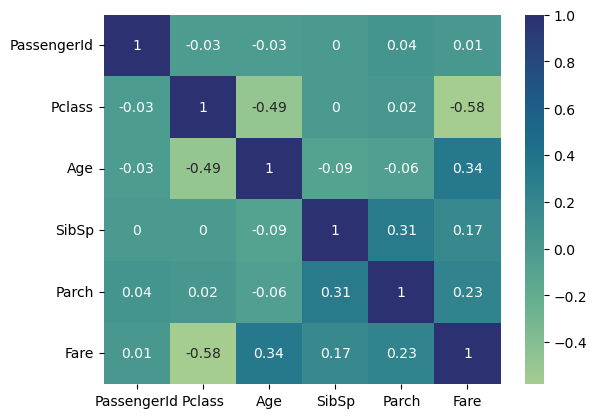

In [28]:
sns.heatmap(x.corr().round(2),annot=True,cmap='crest')

In [33]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['SexEnc']=encoder.fit_transform(df['Sex'])
print(df.head())
correlation=df['SexEnc'].corr(df['Survived'])
print("correlation: ",correlation)

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  SexEnc  
0   330911   7.8292   NaN        Q       1  
1   363272   7.0000   NaN        S       0  
2   240276   9.6875   NaN        Q       1  
3   315154   8.6625   NaN        S       1  
4  3101298  12.2875   NaN        S       0  
correlation:  -0.9999999999999999


In [37]:
data = {'Difficulty': ['Easy', 'Medium', 'Hard', 'Medium', 'Easy'],
        'Test Score': [50, 60, 70, 80, 90]}
df=pd.DataFrame(data)
encoder=LabelEncoder()
df['Diff_Encoded']=encoder.fit_transform(df['Difficulty'])
print(df.head())
correlation=df['Diff_Encoded'].corr(df['Test Score'])
print("correlation: ",correlation)

  Difficulty  Test Score  Diff_Encoded
0       Easy          50             0
1     Medium          60             2
2       Hard          70             1
3     Medium          80             2
4       Easy          90             0
correlation:  0.0


In [38]:
data={'color':['Red','Blue','Green','Blue','Red'], 'Test Score':[50,60,70,80,90]}
df=pd.DataFrame(data)
df_enc=pd.get_dummies(df,columns=['color'])
print(df_enc)

   Test Score  color_Blue  color_Green  color_Red
0          50       False        False       True
1          60        True        False      False
2          70       False         True      False
3          80        True        False      False
4          90       False        False       True


In [39]:
correlation=df_enc['color_Red'].corr(df_enc['Test Score'])
print("correlation with red is: ",correlation)

correlation with red is:  -1.2819751242557094e-17
